# *Model:* GARCH
# *Stock Data:* NSEI
# *Name: *Abbas Amjherawala**

In [1]:
#install arch module
!pip install arch

#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, acf, pacf
from arch import arch_model
from datetime import datetime, timedelta, timezone
from time import time
import warnings

#ignore warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 903.7/903.7 kB 13.2 MB/s eta 0:00:00a 0:00:01


In [2]:
#retrieve data from stock csv and split into test and train
_df = pd.read_csv('/kaggle/input/nsei-prev-data/in_nsei_daily.csv', index_col='minute', parse_dates=True)
_df = _df.interpolate()
train_data = _df[:'2020-12-31']
test_data = _df['2021-01-01':]
print(train_data)
print(test_data)

                          ticker    instrument_token      open      high  \
minute                                                                     
2017-01-02 09:15:00+05:30   NSEI  uf-n-1647516806122   8211.70   8211.70   
2017-01-03 09:15:00+05:30   NSEI  uf-n-1647516806122   8195.25   8219.00   
2017-01-04 09:15:00+05:30   NSEI  uf-n-1647516806122   8201.60   8218.45   
2017-01-05 09:15:00+05:30   NSEI  uf-n-1647516806122   8227.75   8282.55   
2017-01-06 09:15:00+05:30   NSEI  uf-n-1647516806122   8283.50   8306.50   
...                          ...                 ...       ...       ...   
2020-12-24 09:15:00+05:30   NSEI  uf-n-1647516806122  13643.95  13771.75   
2020-12-28 09:15:00+05:30   NSEI  uf-n-1647516806122  13824.40  13885.30   
2020-12-29 09:15:00+05:30   NSEI  uf-n-1647516806122  13915.50  13967.60   
2020-12-30 09:15:00+05:30   NSEI  uf-n-1647516806122  13982.90  13997.00   
2020-12-31 09:15:00+05:30   NSEI  uf-n-1647516806122  13978.25  14024.85   

           

In [3]:
prices = train_data['close']
prices

minute
2017-01-02 09:15:00+05:30     8178.70
2017-01-03 09:15:00+05:30     8188.60
2017-01-04 09:15:00+05:30     8196.55
2017-01-05 09:15:00+05:30     8269.90
2017-01-06 09:15:00+05:30     8247.85
                               ...   
2020-12-24 09:15:00+05:30    13740.40
2020-12-28 09:15:00+05:30    13883.25
2020-12-29 09:15:00+05:30    13928.10
2020-12-30 09:15:00+05:30    13973.65
2020-12-31 09:15:00+05:30    13967.20
Name: close, Length: 987, dtype: float64

In [4]:
returns = prices.pct_change().dropna()
returns

minute
2017-01-03 09:15:00+05:30    0.001210
2017-01-04 09:15:00+05:30    0.000971
2017-01-05 09:15:00+05:30    0.008949
2017-01-06 09:15:00+05:30   -0.002666
2017-01-09 09:15:00+05:30   -0.001540
                               ...   
2020-12-24 09:15:00+05:30    0.009570
2020-12-28 09:15:00+05:30    0.010396
2020-12-29 09:15:00+05:30    0.003231
2020-12-30 09:15:00+05:30    0.003270
2020-12-31 09:15:00+05:30   -0.000462
Name: close, Length: 986, dtype: float64

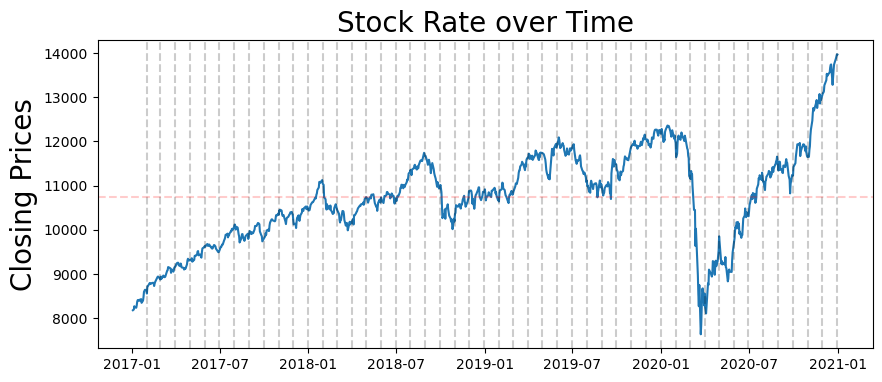

In [5]:
#plot graphs, acf and pacf to determine ar and ma
plt.figure(figsize=(10,4))
plt.plot(prices)
plt.ylabel('Closing Prices', fontsize=20)
plt.title('Stock Rate over Time', fontsize=20)

dates = pd.date_range(start='2017-01-03', end='2020-12-31', freq='M')
for date in dates:
    plt.axvline(date, color='k', linestyle='--', alpha=0.2)
plt.axhline(prices.mean(), color='r', alpha=0.2, linestyle='--')

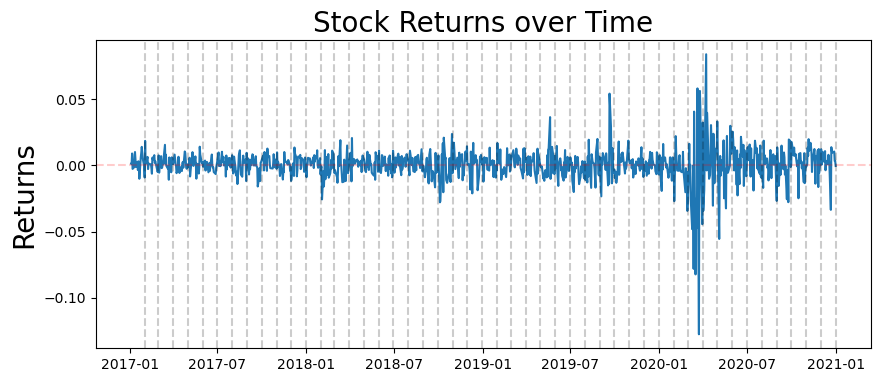

In [6]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Returns', fontsize=20)
plt.title('Stock Returns over Time', fontsize=20)

dates = pd.date_range(start='2017-01-03', end='2020-12-31', freq='M')
for date in dates:
    plt.axvline(date, color='k', linestyle='--', alpha=0.2)
plt.axhline(returns.mean(), color='r', alpha=0.2, linestyle='--')

In [7]:
# Fit an auto-GARCH model
# Set up a grid search for the best orders

import arch

p = range(7)
q = range(7)
best_aic = float('inf')
best_model = None
d={}

for i in p:
    for j in q:
        try:
            # Fit a GARCH model for the current orders
            model = arch.arch_model(returns, vol='GARCH', p=i, q=j)
            result = model.fit(disp='off')
            
            # Check if the current model has a lower AIC than the current best
            current_aic = abs(result.aic)
            d[(i,j)]= current_aic
            if current_aic < best_aic:
                best_aic = current_aic
                best_model = result
                
        except:
            continue
for i,v in d.items():
    print(f'The Model Order {i} has AIC {v}')
print(best_model.summary())

The Model Order (1, 0) has AIC 6230.792224241801
The Model Order (1, 1) has AIC 6531.542435022679
The Model Order (1, 2) has AIC 6525.261183370088
The Model Order (1, 3) has AIC 6523.91112593489
The Model Order (1, 4) has AIC 6517.784263710856
The Model Order (1, 5) has AIC 6507.40442169134
The Model Order (1, 6) has AIC 6499.248121912378
The Model Order (2, 0) has AIC 6375.64966951789
The Model Order (2, 1) has AIC 6526.5022755985065
The Model Order (2, 2) has AIC 6530.5733352676525
The Model Order (2, 3) has AIC 6530.695938337467
The Model Order (2, 4) has AIC 6526.940154512447
The Model Order (2, 5) has AIC 6521.802429360483
The Model Order (2, 6) has AIC 6516.18338634248
The Model Order (3, 0) has AIC 6368.250169399023
The Model Order (3, 1) has AIC 6518.474263271933
The Model Order (3, 2) has AIC 6525.05807730501
The Model Order (3, 3) has AIC 6525.462359209905
The Model Order (3, 4) has AIC 6528.202191481498
The Model Order (3, 5) has AIC 6515.947406794306
The Model Order (3, 6) 

In [8]:
#predict data using model and input manual order (1,0)
import pytz
data_=[]
index_ = test_data.index.tolist()
index_.insert(0, pd.Timestamp('2020-12-31 09:15:00+05:30', tz=pytz.FixedOffset(330)))

try:
    for i in range(1,len(index_)):
        
        returns = train_data['close'].pct_change().dropna()
        model = arch_model(returns, p=1, q=0)
        results = model.fit()
        forecast_horizon = 1
        forecasts = results.forecast(horizon=forecast_horizon)
        predicted_volatility = np.sqrt(forecasts.variance.iloc[-1])
        last_price = train_data[index_[i-1].strftime('%Y-%m-%d')].close[0]
        predicted_price = last_price * np.exp(predicted_volatility * np.random.normal())
        
        train_data.loc[index_[i]] = test_data.loc[index_[i]]            
        if predicted_price[0]<train_data[index_[i-1].strftime('%Y-%m-%d')].close[0]:
            direction='SELL'
            data_.append({'Date': index_[i-1].strftime('%Y-%m-%d'),'Day': index_[i-1].strftime('%A'), 'Current Close Price': train_data[index_[i-1].strftime('%Y-%m-%d')].close[0],'Next Day Price': train_data[index_[i].strftime('%Y-%m-%d')].close[0],'Predicted Direction' : direction,'Predicted Value': predicted_price[0], 'Pnl':train_data[index_[i-1].strftime('%Y-%m-%d')].close[0]-train_data[index_[i].strftime('%Y-%m-%d')].close[0]})
        else:
            direction='BUY'
            data_.append({'Date': index_[i-1].strftime('%Y-%m-%d'),'Day': index_[i-1].strftime('%A'), 'Current Close Price': train_data[index_[i-1].strftime('%Y-%m-%d')].close[0],'Next Day Price': train_data[index_[i].strftime('%Y-%m-%d')].close[0],'Predicted Direction' : direction,'Predicted Value': predicted_price[0], 'Pnl':train_data[index_[i].strftime('%Y-%m-%d')].close[0]-train_data[index_[i-1].strftime('%Y-%m-%d')].close[0]})

    
except KeyboardInterrupt or ValueError:
    print("Output is Stored in csv file: NSEI_STOCK.CSV!")

Iteration:      1,   Func. Count:      5,   Neg. LLF: 1395413336.17438
Iteration:      2,   Func. Count:     16,   Neg. LLF: 3439076471.003587
Iteration:      3,   Func. Count:     27,   Neg. LLF: 13981.127767508402
Iteration:      4,   Func. Count:     37,   Neg. LLF: 742811522.0437802
Iteration:      5,   Func. Count:     48,   Neg. LLF: 3485511301.838132
Iteration:      6,   Func. Count:     60,   Neg. LLF: 29206357.641010452
Iteration:      7,   Func. Count:     72,   Neg. LLF: 119654.85916633221
Iteration:      8,   Func. Count:     82,   Neg. LLF: 1.7998396956368078e+16
Iteration:      9,   Func. Count:     93,   Neg. LLF: 3686940.8040884887
Iteration:     10,   Func. Count:    104,   Neg. LLF: 3.395584351756321e+17
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3118.3961121209004
            Iterations: 13
            Function evaluations: 113
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      5,   Neg. LLF: 59

In [9]:
#append data to a list and store in csv
import csv
import os

headers = ['Date', 'Day', 'Current Close Price', 'Next Day Price','Predicted Direction', 'Predicted Value','Pnl']

if os.path.exists('/kaggle/working/nsei_stock.csv'):
    with open('nsei_stock.csv', mode='a', newline='') as csv_file:
        writer = csv.DictWriter(csv_file, fieldnames=headers)
        for row in data_:
            writer.writerow(row)
else:
    with open('nsei_stock.csv', mode='w', newline='') as csv_file:
        writer = csv.DictWriter(csv_file, fieldnames=headers)
        writer.writeheader()
        for row in data_:
            writer.writerow(row)


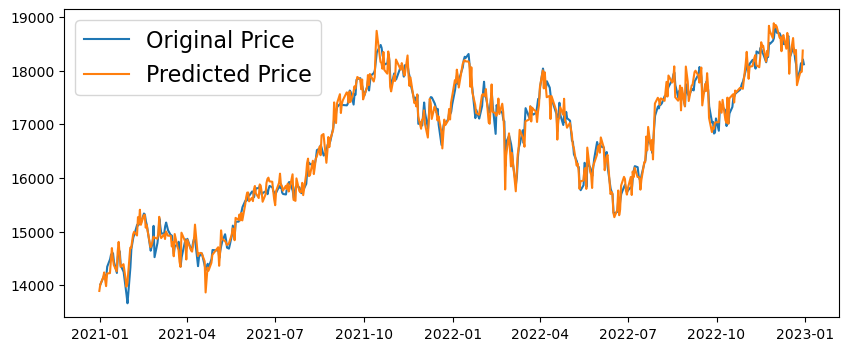

In [10]:
#plot graph between original and predicted
_df = pd.read_csv('/kaggle/working/nsei_stock.csv', index_col='Date', parse_dates=True)
plt.figure(figsize=(10,4))

plt.plot(test_data.close)
plt.plot(_df['Predicted Value'])
plt.legend(('Original Price', 'Predicted Price'), fontsize=16)